In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [40]:
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [41]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')

In [42]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [44]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [45]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [61]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaled = StandardScaler()

X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)

In [64]:
model = Sequential()

model.add(Dense(8,activation='relu',input_dim=11))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 8)                 96        
                                                                 
 dense_14 (Dense)            (None, 8)                 72        
                                                                 
 dense_15 (Dense)            (None, 6)                 54        
                                                                 
 dense_16 (Dense)            (None, 4)                 28        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 255
Trainable params: 255
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics='accuracy')

In [67]:
history = model.fit(X_train, y_train, epochs=90, batch_size=50, validation_split=0.2, verbose=1)

Epoch 1/100
128/128 [==============================] - 1s 4ms/step - loss: 4971.5103 - accuracy: 0.3842 - val_loss: 562.3224 - val_accuracy: 0.6600
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 185.6280 - accuracy: 0.6672 - val_loss: 26.2595 - val_accuracy: 0.7163
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 17.7237 - accuracy: 0.7038 - val_loss: 8.7549 - val_accuracy: 0.7225
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 8.7474 - accuracy: 0.7242 - val_loss: 7.5793 - val_accuracy: 0.5337
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 5.3269 - accuracy: 0.7336 - val_loss: 2.5916 - val_accuracy: 0.7431
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 3.2715 - accuracy: 0.7320 - val_loss: 1.8654 - val_accuracy: 0.7744
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 2.3891 - accuracy: 0.7278 - val_loss: 2.0093 - val_accurac

In [68]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

63/63 [==============================] - 0s 1ms/step


In [69]:
accuracy_score(y_test, y_pred)

0.7925

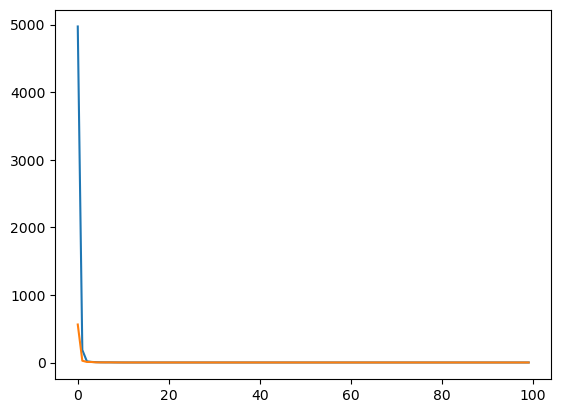

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

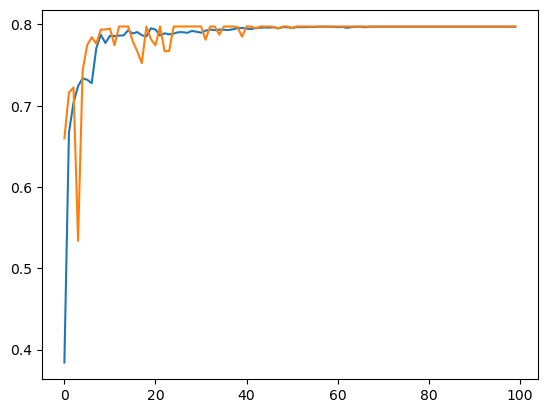

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])